<a href="https://colab.research.google.com/github/oktaviacitra/classification/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read File CSV

In [1]:
from google.colab import drive

origin_path = "/content/drive"
drive.mount(origin_path)

Mounted at /content/drive


In [2]:
import pandas as pd

folder_path = origin_path + "/MyDrive/Learning Journey/Breast Cancer"
dataset_path = folder_path + "/dataset.csv"
dataframe = pd.read_csv(dataset_path)
dataframe.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


# Preprocessing Data

In [3]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(dataframe.iloc[:, 2:])
y = pd.factorize(dataframe.iloc[:, 1])[0]

X.shape, y.shape

((569, 30), (569,))

# Select Best Feature

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,f_classif

pipeline = Pipeline(
    [
     ('selector',SelectKBest(f_classif)),
     ('model',RandomForestClassifier(max_depth=2, random_state=0))
    ]
)

In [5]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(
    estimator = pipeline,
    param_grid = {'selector__k':[i for i in range(2, 30)]},
    n_jobs=-1,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=3
)

In [6]:
search.fit(X, y)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selector', SelectKBest()),
                                       ('model',
                                        RandomForestClassifier(max_depth=2,
                                                               random_state=0))]),
             n_jobs=-1,
             param_grid={'selector__k': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29]},
             scoring='neg_mean_squared_error', verbose=3)

In [7]:
search.best_params_

{'selector__k': 25}

In [8]:
search.best_score_

-0.04216736531594473

In [9]:
from sklearn.feature_selection import chi2

X_new = SelectKBest(f_classif, k=25).fit_transform(X, y)
X_new.shape

(569, 25)

# Splitting Data

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((398, 25), (171, 25))

In [11]:
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

# Evaluation

In [13]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.95      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



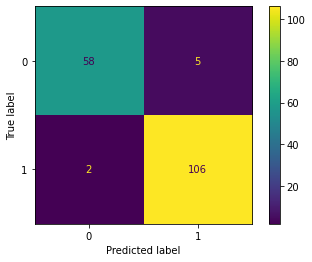

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()